In [ ]:
# Import and plot drought index data

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from datetime import datetime

In [2]:
# Import data
jan_drought = pd.read_csv('Resources/Drought/1990-2020_jan_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
feb_drought = pd.read_csv('Resources/Drought/1990-2020_feb_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
mar_drought = pd.read_csv('Resources/Drought/1990-2020_mar_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
apr_drought = pd.read_csv('Resources/Drought/1990-2020_apr_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
may_drought = pd.read_csv('Resources/Drought/1990-2020_may_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
jun_drought = pd.read_csv('Resources/Drought/1990-2020_jun_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
jul_drought = pd.read_csv('Resources/Drought/1990-2020_jul_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
aug_drought = pd.read_csv('Resources/Drought/1990-2020_aug_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
sep_drought = pd.read_csv('Resources/Drought/1990-2020_sep_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
oct_drought = pd.read_csv('Resources/Drought/1990-2020_oct_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
nov_drought = pd.read_csv('Resources/Drought/1990-2020_nov_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
dec_drought = pd.read_csv('Resources/Drought/1990-2020_dec_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')

In [3]:
jan_drought.head()

,California,Palmer Drought Severity Index (PDSI),January
0,199001,-2.47,-2.42
1,199101,-5.07,-5.02
2,199201,-3.22,-3.17
3,199301,2.79,2.84
4,199401,-2.44,-2.39


In [4]:
# Remove anomaly column
# List of dataframes
drought_dfs = [jan_drought, feb_drought, mar_drought, apr_drought, may_drought, jun_drought, jul_drought, aug_drought, sep_drought, oct_drought, nov_drought, dec_drought]

# Create a for loop to change last column to "NA" for all dfs and then drop column "NA" 
for df in drought_dfs:
    df.columns = ['Date', 'PDSI', 'NA']
#     df['Avg Temp (F)'] = df['Average Temperature']
#     df.drop('Average Temperature', 1, inplace= True)
    del df['NA']

In [5]:
jan_drought.head()

,Date,PDSI
0,199001,-2.47
1,199101,-5.07
2,199201,-3.22
3,199301,2.79
4,199401,-2.44


In [6]:
# Create a loop to get year and month from all dataframes 
drought_dfs = [jan_drought, feb_drought, mar_drought, apr_drought, may_drought, jun_drought, jul_drought, aug_drought, sep_drought, oct_drought, nov_drought, dec_drought]

for df in drought_dfs:
    df['fake_year'] = pd.to_datetime(df['Date'],format='%Y%m')
    df['Year'] = pd.DatetimeIndex(df['fake_year']).year
    df['Month'] = pd.DatetimeIndex(df['fake_year']).month
    df.drop('fake_year', 1, inplace= True)
    df.drop('Date', 1, inplace= True)

In [7]:
jan_drought.head()

,PDSI,Year,Month
0,-2.47,1990,1
1,-5.07,1991,1
2,-3.22,1992,1
3,2.79,1993,1
4,-2.44,1994,1


In [8]:
# Set year as index
for df in drought_dfs:
    df.set_index('Year', 1, inplace = True)

In [9]:
# Merge data from Jan-Dec on Month (or year), how = left
t1 = pd.merge(jan_drought, feb_drought, on= 'Year', how= 'left', suffixes=('_Jan', '_Feb'))
t2 = pd.merge(t1, mar_drought,  on= 'Year', how= 'left', suffixes=("",""))
t3 = pd.merge(t2, apr_drought,  on= 'Year', how= 'left', suffixes=('_Mar', '_Apr'))
t4 = pd.merge(t3, may_drought,  on= 'Year', how= 'left', suffixes=("",""))
t5 = pd.merge(t4, jun_drought,  on= 'Year', how= 'left', suffixes=('_May', '_Jun'))
t5.drop(['Month_Jan', 'Month_Feb', 'Month_Mar', 'Month_Apr', 'Month_May', 'Month_Jun'], 1, inplace = True)
t6 = pd.merge(t5, jul_drought,  on= 'Year', how= 'left', suffixes=("",""))
t7 = pd.merge(t6, aug_drought,  on= 'Year', how= 'left', suffixes=('_Jul', '_Aug'))
t8 = pd.merge(t7, sep_drought,  on= 'Year', how= 'left', suffixes=("",""))
t9 = pd.merge(t8, oct_drought,  on= 'Year', how= 'left', suffixes=('_Sep', '_Oct'))
t10 = pd.merge(t9, nov_drought,  on= 'Year', how= 'left', suffixes=("",""))
merged_df = pd.merge(t10, dec_drought,  on= 'Year', how= 'left', suffixes=('_Nov', '_Dec')) 
merged_df.drop(['Month_Jul', 'Month_Aug', 'Month_Sep', 'Month_Oct', 'Month_Nov', 'Month_Dec'], 1, inplace = True)

In [10]:
# Add yearly mean
merged_df['yearly mean'] = merged_df.mean(axis=1)
merged_df.head()

,PDSI_Jan,PDSI_Feb,PDSI_Mar,PDSI_Apr,PDSI_May,PDSI_Jun,PDSI_Jul,PDSI_Aug,PDSI_Sep,PDSI_Oct,PDSI_Nov,PDSI_Dec,yearly mean
Year,,,,,,,,,,,,,
1990,-2.47,-2.86,-3.51,-3.81,-2.71,-2.85,-2.83,-2.54,-2.36,-2.71,-3.26,-3.95,-2.988333
1991,-5.07,-5.68,-2.65,-2.77,-2.35,-1.95,-1.43,-1.30,-1.43,-1.47,-2.05,-2.43,-2.548333
1992,-3.22,-2.46,-2.04,-2.34,-2.77,-2.93,-2.99,-2.86,-3.04,-2.31,-2.93,0.90,-2.415833
1993,2.79,3.44,2.90,2.46,2.68,3.06,3.02,2.89,-0.39,-0.70,-1.12,-1.53,1.625000
1994,-2.44,-2.26,-2.96,-2.89,-2.20,-2.04,-2.22,-2.41,-2.33,-2.45,0.59,0.29,-1.943333


In [11]:
# Reset index
new_df = merged_df.reset_index()
new_df.head()

,Year,PDSI_Jan,PDSI_Feb,PDSI_Mar,PDSI_Apr,PDSI_May,PDSI_Jun,PDSI_Jul,PDSI_Aug,PDSI_Sep,PDSI_Oct,PDSI_Nov,PDSI_Dec,yearly mean
0,1990,-2.47,-2.86,-3.51,-3.81,-2.71,-2.85,-2.83,-2.54,-2.36,-2.71,-3.26,-3.95,-2.988333
1,1991,-5.07,-5.68,-2.65,-2.77,-2.35,-1.95,-1.43,-1.30,-1.43,-1.47,-2.05,-2.43,-2.548333
2,1992,-3.22,-2.46,-2.04,-2.34,-2.77,-2.93,-2.99,-2.86,-3.04,-2.31,-2.93,0.90,-2.415833
3,1993,2.79,3.44,2.90,2.46,2.68,3.06,3.02,2.89,-0.39,-0.70,-1.12,-1.53,1.625000
4,1994,-2.44,-2.26,-2.96,-2.89,-2.20,-2.04,-2.22,-2.41,-2.33,-2.45,0.59,0.29,-1.943333


In [12]:
# Create csv file for dataframe new_df
new_df.to_csv(r'c:Resources/CA_drought.csv', index = False, header = True)
test_df = pd.read_csv('Resources/CA_drought.csv')
test_df.head()

,Year,PDSI_Jan,PDSI_Feb,PDSI_Mar,PDSI_Apr,PDSI_May,PDSI_Jun,PDSI_Jul,PDSI_Aug,PDSI_Sep,PDSI_Oct,PDSI_Nov,PDSI_Dec,yearly mean
0,1990,-2.47,-2.86,-3.51,-3.81,-2.71,-2.85,-2.83,-2.54,-2.36,-2.71,-3.26,-3.95,-2.988333
1,1991,-5.07,-5.68,-2.65,-2.77,-2.35,-1.95,-1.43,-1.30,-1.43,-1.47,-2.05,-2.43,-2.548333
2,1992,-3.22,-2.46,-2.04,-2.34,-2.77,-2.93,-2.99,-2.86,-3.04,-2.31,-2.93,0.90,-2.415833
3,1993,2.79,3.44,2.90,2.46,2.68,3.06,3.02,2.89,-0.39,-0.70,-1.12,-1.53,1.625000
4,1994,-2.44,-2.26,-2.96,-2.89,-2.20,-2.04,-2.22,-2.41,-2.33,-2.45,0.59,0.29,-1.943333


The correlation between year and the Yearly Average Temperature is -0.26


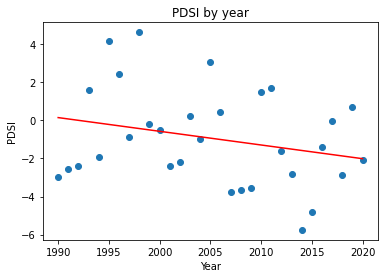

In [13]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(new_df['Year'],new_df['yearly mean'])[0],2)

# # Regression
slope, intercept, r, p, std_err = st.linregress(new_df['Year'],new_df['yearly mean'])

# # Calculate regression equation 
y = slope * new_df['Year'] + intercept

# # Plot the scatter
plt.scatter(new_df['Year'],new_df['yearly mean'])
plt.xlabel("Year")
plt.ylabel("PDSI") 
plt.title("PDSI by year")

# # Add regression line
plt.plot(new_df['Year'], y, "r-")
print(f'The correlation between year and the Yearly Average Temperature is {corr_coef}')

**Split data into wet and dry seasons**

In [14]:
# Split data into wet and dry season for drought
# oct-april = wet season
# may-sep = dry season



# t3 = pd.merge(t2, apr_avg_temp,  on= 'Year', how= 'left', suffixes=('_Mar', '_Apr'))
dr4 = pd.merge(apr_drought, may_drought,  on= 'Year', how= 'left', suffixes=("_Apr","_May"))
dr5 = pd.merge(dr4, jun_drought,  on= 'Year', how= 'left', suffixes=("",""))
dr6 = pd.merge(dr5, jul_drought,  on= 'Year', how= 'left', suffixes=("_Jun","_Jul"))
dr7 = pd.merge(dr6, aug_drought,  on= 'Year', how= 'left', suffixes=("",""))
dr8 = pd.merge(dr7, sep_drought,  on= 'Year', how= 'left', suffixes=("_Aug","_Sep"))
dr8.drop(['Month_Apr', 'Month_May', 'Month_Jun', 'Month_Jul', 'Month_Aug', 'Month_Aug', 'Month_Sep'], 1, inplace = True)

In [15]:
dry_seasond = dr8
# dry_seasond

In [16]:
dry_seasond['dry season mean'] = dry_seasond.mean(axis=1)
dry_seasond.head()


,PDSI_Apr,PDSI_May,PDSI_Jun,PDSI_Jul,PDSI_Aug,PDSI_Sep,dry season mean
Year,,,,,,,
1990,-3.81,-2.71,-2.85,-2.83,-2.54,-2.36,-2.850000
1991,-2.77,-2.35,-1.95,-1.43,-1.30,-1.43,-1.871667
1992,-2.34,-2.77,-2.93,-2.99,-2.86,-3.04,-2.821667
1993,2.46,2.68,3.06,3.02,2.89,-0.39,2.286667
1994,-2.89,-2.20,-2.04,-2.22,-2.41,-2.33,-2.348333


In [17]:
dry_seasond = dry_seasond.reset_index()
dry_seasond.head()

,Year,PDSI_Apr,PDSI_May,PDSI_Jun,PDSI_Jul,PDSI_Aug,PDSI_Sep,dry season mean
0,1990,-3.81,-2.71,-2.85,-2.83,-2.54,-2.36,-2.850000
1,1991,-2.77,-2.35,-1.95,-1.43,-1.30,-1.43,-1.871667
2,1992,-2.34,-2.77,-2.93,-2.99,-2.86,-3.04,-2.821667
3,1993,2.46,2.68,3.06,3.02,2.89,-0.39,2.286667
4,1994,-2.89,-2.20,-2.04,-2.22,-2.41,-2.33,-2.348333


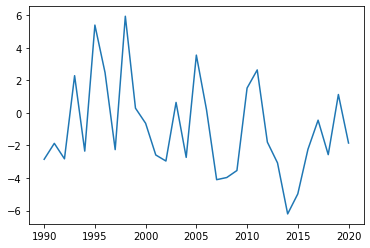

In [18]:
x = dry_seasond['Year']
y = dry_seasond['dry season mean']

plt.plot(x,y)

The correlation between year and the Yearly Average Temperature is -0.25


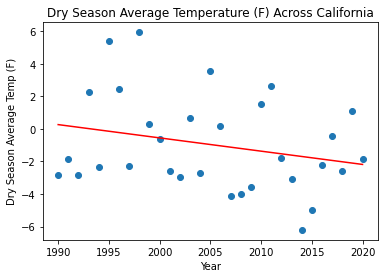

In [19]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(dry_seasond['Year'],dry_seasond['dry season mean'])[0],2)

# # Regression
slope, intercept, r, p, std_err = st.linregress(dry_seasond['Year'],dry_seasond['dry season mean'])

# # Calculate regression equation 
y = slope * dry_seasond['Year'] + intercept

# # Plot the scatter
plt.scatter(dry_seasond['Year'],dry_seasond['dry season mean'])
plt.xlabel("Year")
plt.ylabel("Dry Season Average Temp (F)") 
plt.title("Dry Season Average Temperature (F) Across California")

# # Add regression line
plt.plot(dry_seasond['Year'], y, "r-")
print(f'The correlation between year and the Yearly Average Temperature is {corr_coef}')

In [20]:
dry_seasond.to_csv(r'c:Resources/EL_dry_season_dr', index = False, header = True)

In [21]:
# Split data into wet and dry season for drought
# oct-april = wet season
# may-sep = dry season

# t3 = pd.merge(t2, apr_avg_temp,  on= 'Year', how= 'left', suffixes=('_Mar', '_Apr'))
dr1 = pd.merge(oct_drought, nov_drought,  on= 'Year', how= 'left', suffixes=("_Oct","_Nov"))
dr2 = pd.merge(dr1, dec_drought,  on= 'Year', how= 'left', suffixes=("",""))
dr3 = pd.merge(dr2, jan_drought,  on= 'Year', how= 'left', suffixes=("_Dec","_Jan"))
dr4 = pd.merge(dr3, feb_drought,  on= 'Year', how= 'left', suffixes=("",""))
dr5 = pd.merge(dr4, mar_drought,  on= 'Year', how= 'left', suffixes=("_Feb","_Mar"))
dr5.drop(['Month_Oct', 'Month_Nov', 'Month_Dec', 'Month_Jan', 'Month_Feb', 'Month_Mar'], 1, inplace = True)

In [22]:
wet_drought = dr5

In [23]:
wet_drought['wet season mean'] = wet_drought.mean(axis=1)
wet_drought.head()

,PDSI_Oct,PDSI_Nov,PDSI_Dec,PDSI_Jan,PDSI_Feb,PDSI_Mar,wet season mean
Year,,,,,,,
1990,-2.71,-3.26,-3.95,-2.47,-2.86,-3.51,-3.126667
1991,-1.47,-2.05,-2.43,-5.07,-5.68,-2.65,-3.225000
1992,-2.31,-2.93,0.90,-3.22,-2.46,-2.04,-2.010000
1993,-0.70,-1.12,-1.53,2.79,3.44,2.90,0.963333
1994,-2.45,0.59,0.29,-2.44,-2.26,-2.96,-1.538333


In [24]:
wet_drought = wet_drought.reset_index()
wet_drought.head()

,Year,PDSI_Oct,PDSI_Nov,PDSI_Dec,PDSI_Jan,PDSI_Feb,PDSI_Mar,wet season mean
0,1990,-2.71,-3.26,-3.95,-2.47,-2.86,-3.51,-3.126667
1,1991,-1.47,-2.05,-2.43,-5.07,-5.68,-2.65,-3.225000
2,1992,-2.31,-2.93,0.90,-3.22,-2.46,-2.04,-2.010000
3,1993,-0.70,-1.12,-1.53,2.79,3.44,2.90,0.963333
4,1994,-2.45,0.59,0.29,-2.44,-2.26,-2.96,-1.538333


In [25]:
wet_drought.to_csv(r'c:Resources/EL_wet_drought.csv', index = False, header = True)

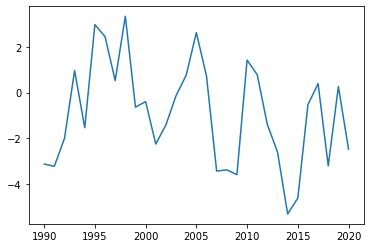

In [26]:
x = wet_drought['Year']
y = wet_drought['wet season mean']

plt.plot(x,y)